In [2]:
using TaylorSeries, IntervalArithmetic, Plots

In [3]:
T(x) = 4*x+0.01*sin(8*pi*x)

T (generic function with 1 method)

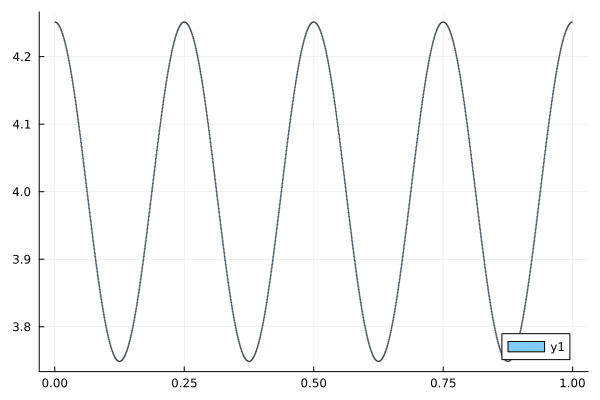

In [5]:
n = 1024
In = [interval(Float64(i), Float64(i+1))/n for i in 0:n-1]
Ct = [T(Taylor1([x, 1], 100))[1] for x in In]
rect = In .× Ct 
plot(rect)

In [6]:
c1 = abs(1/(hull(Ct))) 

[0.23522, 0.266762]

In [9]:
I = @interval 0 1

[0, 1]

In [11]:
TM100 = Taylor1([I, 1], 100)

 [0, 1] + [1, 1] t + 𝒪(t¹⁰¹)

In [18]:
distortionJ(x) = 1/(TaylorSeries.derivative(T(TM100)))

distortionJ (generic function with 1 method)

In [19]:
Ct2 = [distortionJ(Taylor1([x, 1], 100))[1] for x in In]

1024-element Vector{Interval{Float64}}:
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
   ⋮
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]

In [20]:
c2 = abs((hull(Ct2))) 

[0, 0.449495]

##### Let's check using package RigorousInvariantMeasures

In [21]:
using RigorousInvariantMeasures

In [22]:
D = mod1_dynamic(x->4*x+0.01*RigorousInvariantMeasures.sinpi(8*x))

Piecewise-defined dynamic with 4 branches

In [23]:
B = Ulam(1024)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025))

In [24]:
Q = DiscretizedOperator(B, D)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/mutare/.julia/packages/RigorousInvariantMeasures/DkT8G/src/GenericAssembler.jl:102


Computing preimages...  50%|██████████████▌              |  ETA: 0:00:01

Computing preimages... 100%|█████████████████████████████| Time: 0:00:02


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1, 2, 3, 4, 5, 5, 6, 7, 8, 9  …  1016, 1017, 1018, 1019, 1020, 1020, 1021, 1022, 1023, 1024], [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41

In [25]:
norms = powernormbounds(B, D; Q=Q)

32-element Vector{Float64}:
 1.0000000000100044
 1.000000000020009
 1.0000000000300138
 1.0000000000400184
 0.43707326931620843
 0.17114800191899193
 0.035217556616361105
 0.006136036470868896
 0.0061360364709302844
 0.006136036470991673
 ⋮
 2.310275629193955e-7
 2.310275629217068e-7
 2.3102756292401813e-7
 2.3102756292632944e-7
 2.3102756292864076e-7
 1.0097597222733624e-7
 3.953990578186873e-8
 8.136226277053739e-9
 1.4175935518493694e-9

In [26]:
w = invariant_vector(B, Q)

1024-element Vector{Float64}:
 0.9409023502850036
 0.9409042041981672
 0.9409079119920843
 0.9409134736296665
 0.9409209005056883
 0.9409301734120277
 0.9409412959956899
 0.9409542719591494
 0.9409690867011282
 0.9409857543016963
 ⋮
 0.9409690867011304
 0.9409542719591256
 0.9409412959956894
 0.9409301734120283
 0.9409209005056682
 0.9409134736296687
 0.9409079119920899
 0.9409042041981512
 0.9409023502849865

In [27]:
error = distance_from_invariant(B, D, Q, w, norms)

0.0060366934691403135

In [28]:
using LaTeXStrings

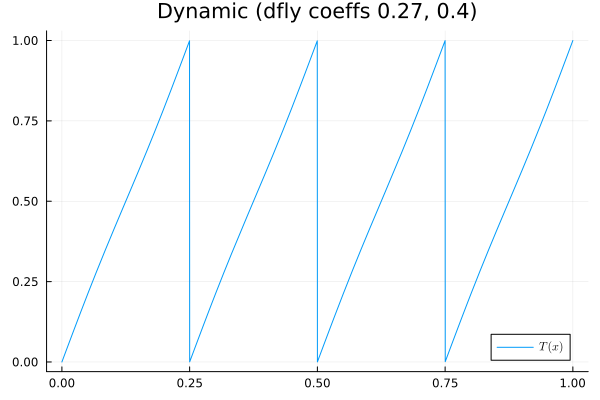

In [29]:
A, BB = dfly(strong_norm(B), aux_norm(B), D)
plot(D, title="Dynamic (dfly coeffs $(round(A, sigdigits=2)), $(round(BB, sigdigits=2)))", label=L"T(x)", legend=:bottomright)

In [31]:
return c1.hi, c2.hi

(0.26676109385432667, 0.44949482750967185)